In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

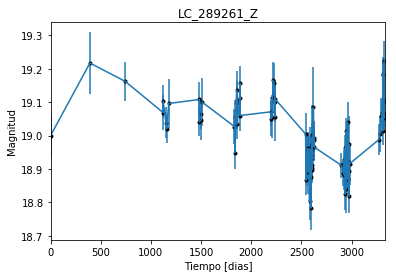

In [2]:
data = np.genfromtxt('LC_289261_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_289261_Z')
plt.savefig("LC_289261_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

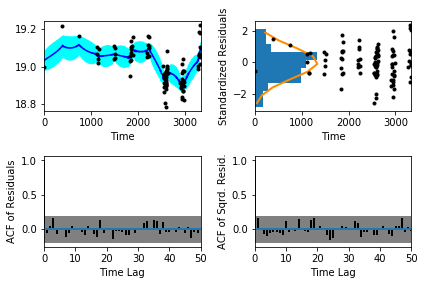

In [5]:
sample.assess_fit()

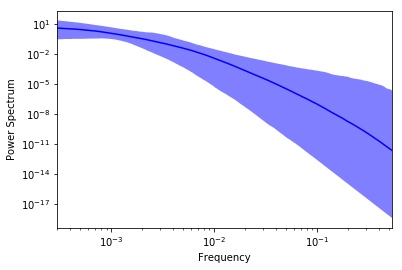

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

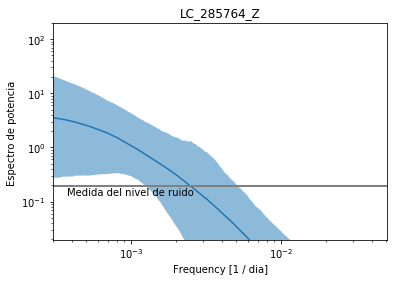

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_Z')

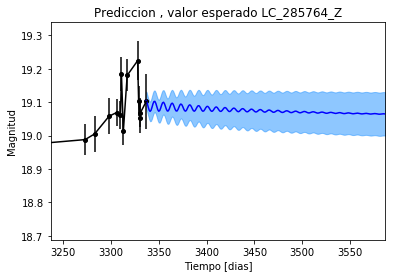

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_Z')

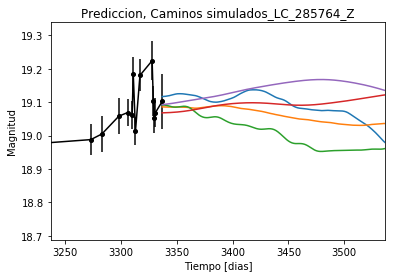

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


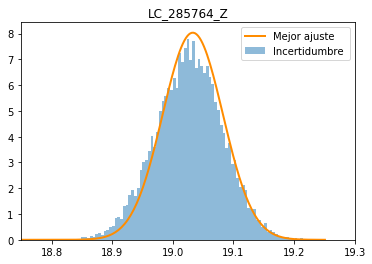

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_Z')
plt.savefig("Mejor_ajuste_LC_285764_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_Z')

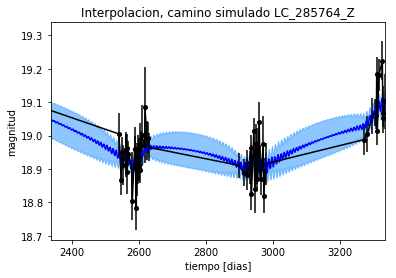

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_Z')

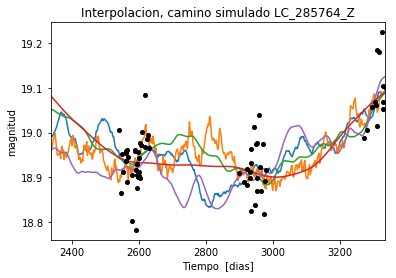

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 821.935128361
Median: 0.0170408632074
Standard deviation: 0.222947426536
68% credibility interval: [ 0.00124588  0.24324338]
95% credibility interval: [  3.80867488e-04   8.79554243e-01]
99% credibility interval: [  3.13659386e-04   1.04197996e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 675.699928448
Median: 0.00283184845268
Standard deviation: 0.110002688305
68% credibility interval: [ 0.00053586  0.04284388]
95% credibility interval: [  3.29846806e-04   3.63231220e-01]
99% credibility interval: [  3.03799070e-04   7.58236089e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 551.961247709
Median: 0.0245667213715


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1327.7600878
Median: 206.893463754
Standard deviation: 1.51154937408
68% credibility interval: [ 205.13184361  207.89857473]
95% credibility interval: [ 202.81653294  208.56877653]
99% credibility interval: [ 200.84202293  208.98078132]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 643.147472477
Median: 0.943547942829
Standard deviation: 2.45955417819
68% credibility interval: [ 0.08301267  4.51543048]
95% credibility interval: [ 0.01737497  8.50685429]
99% credibility interval: [  1.12134976e-02   1.14640228e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 846.961608921
Median: 0.610336297923
Standard deviation: 10.7151828759
68% credibility interval: [  0.02479333  10.18075321]
95% credibility interval: [  1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2410.79798374
Median: 1.00294635287e-27
Standard deviation: 5.23790663307e+66
68% credibility interval: [  1.13178778e-82   7.09368878e-06]
95% credibility interval: [  7.62404530e-129   3.17491898e+018]
99% credibility interval: [  2.72522127e-134   6.09995518e+065]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1886.35306482
Median: 19.0475525461
Standard deviation: 0.0472870069751
68% credibility interval: [ 19.00920877  19.0891519 ]
95% credibility interval: [ 18.96180891  19.15343515]
99% credibility interval: [ 18.91167182  19.20700507]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 297.141642627
Median: 0.00610418507237
Standard deviation: 0.258588106797
68% credibility interval: [ 0.          0.35631785]
95% credibility interval: [ 0.          0.95064278]
99% credibility interval: [ 0.          1.04783203]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 297.141642627
Median: 0.00610418507237
Standard deviation: 0.258588106797
68% credibility interval: [ 0.          0.35631785]
95% credibility interval: [ 0.          0.95064278]
99% credibility interval: [ 0.          1.04783203]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1188.21351637
Median: 0.0
Standard deviation: 0.000611626228281
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1327.7600878
Median: 206.893463754
Standard deviation: 1.51154937408
68% credibility interval: [ 205.13184361  207.89857473]
95% credibility interval: [ 202.81653294  208.56877653]
99% credibility interval: [ 200.84202293  208.98078132]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2874.55570467
Median: 0.00813596110105
Standard deviation: 0.00906340745115
68% credibility interval: [ 0.00479715  0.01526747]
95% credibility interval: [ 0.00296077  0.03303843]
99% credibility interval: [ 0.00229016  0.05743716]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1978.54042248
Median: 1.01699258459
Standard deviation: 0.130282046822
68% credibility interval: [ 0.89528672  1.15122729]
95% credibility interval: [ 0.79061426  1.30339265]
99% credibility interval: [ 0.73103811  1.40772819]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 982.923171503
Median: 0.000140751695726
Standard deviation: 0.0942384593224
68% credibility interval: [  1.80061160e-06   4.76794530e-03]
95% credibility interval: [  8.54011313e-22   1.47589744e-01]
99% credibility interval: [  3.06891759e-68   6.24669127e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 821.935128361
Median: (-0.107070901326-0.0319767800427j)
Standard deviation: 2.14525801352
68% credibility interval: [-1.52834322+0.j         -0.00782809-0.05454009j]
95% credibility interval: [ -5.52640229e+00+0.j          -2.39306101e-03-0.00294521j]
99% credibility interval: [ -6.54695316e+00-5.17868765j  -1.97078004e-03-0.02065034j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 675.699928448
Median: (-0.0177930285901+0j)
Standard deviation: 1.76565780631
68% credibility interval: [-0.26919607+0.49744512j -0.00336690+0.j        ]
95% credibility interval: [ -2.28224907e+00+1.5625881j  -2.07248861e-03+0.j       ]
99% credibility interval: [ -4.76413785e+00+3.60895942j  -1.90882585e-03+0.j        ]
Posterior summary